# Logistic Regression From Scratch

We are going to build logistic regression from scratch using gradient descent

### $$ Cross Entropy = -\frac{1}{m}\sum_{i=1}^{m}[y^ilog(z(x^i)) + (1-y^i)log(1-z(x^i))]$$

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Breast Cancer Dataset

In [2]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

In [3]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Scaling

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

## Train and Test Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Logistic Regression

In [6]:
class LogisticRegression:
    
    def sigmoid(self, x):
        return 1 / (1 + np.e**(-x))
    
    def cost_function(self, X, y, weights): 
        
        cost_for_1 = y * np.log(self.sigmoid(np.dot(X, weights)))
        cost_for_0 = (1 - y) * np.log(1 - self.sigmoid(np.dot(X, weights)))
        
        return -sum(cost_for_1 - cost_for_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):
        
        loss = []
        N = len(X)
        weights = np.random.rand(X.shape[1])
                   
        for _ in range(epochs):
        
            # Gradient Descent
            y_hat = self.sigmoid(np.dot(X, weights))
            weights -= lr * np.dot(X.T,  y_hat - y) / N
            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights))
        
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):
        
        # Predicting with sigmoid function
        z = np.dot(X, self.weights)
        
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

## Predictions

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.1)
y_pred = logreg.predict(X_test)

## Evaluation

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        67
           1       0.94      0.99      0.96       121

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



In [9]:
print(confusion_matrix(y_test, y_pred))

[[ 59   8]
 [  1 120]]


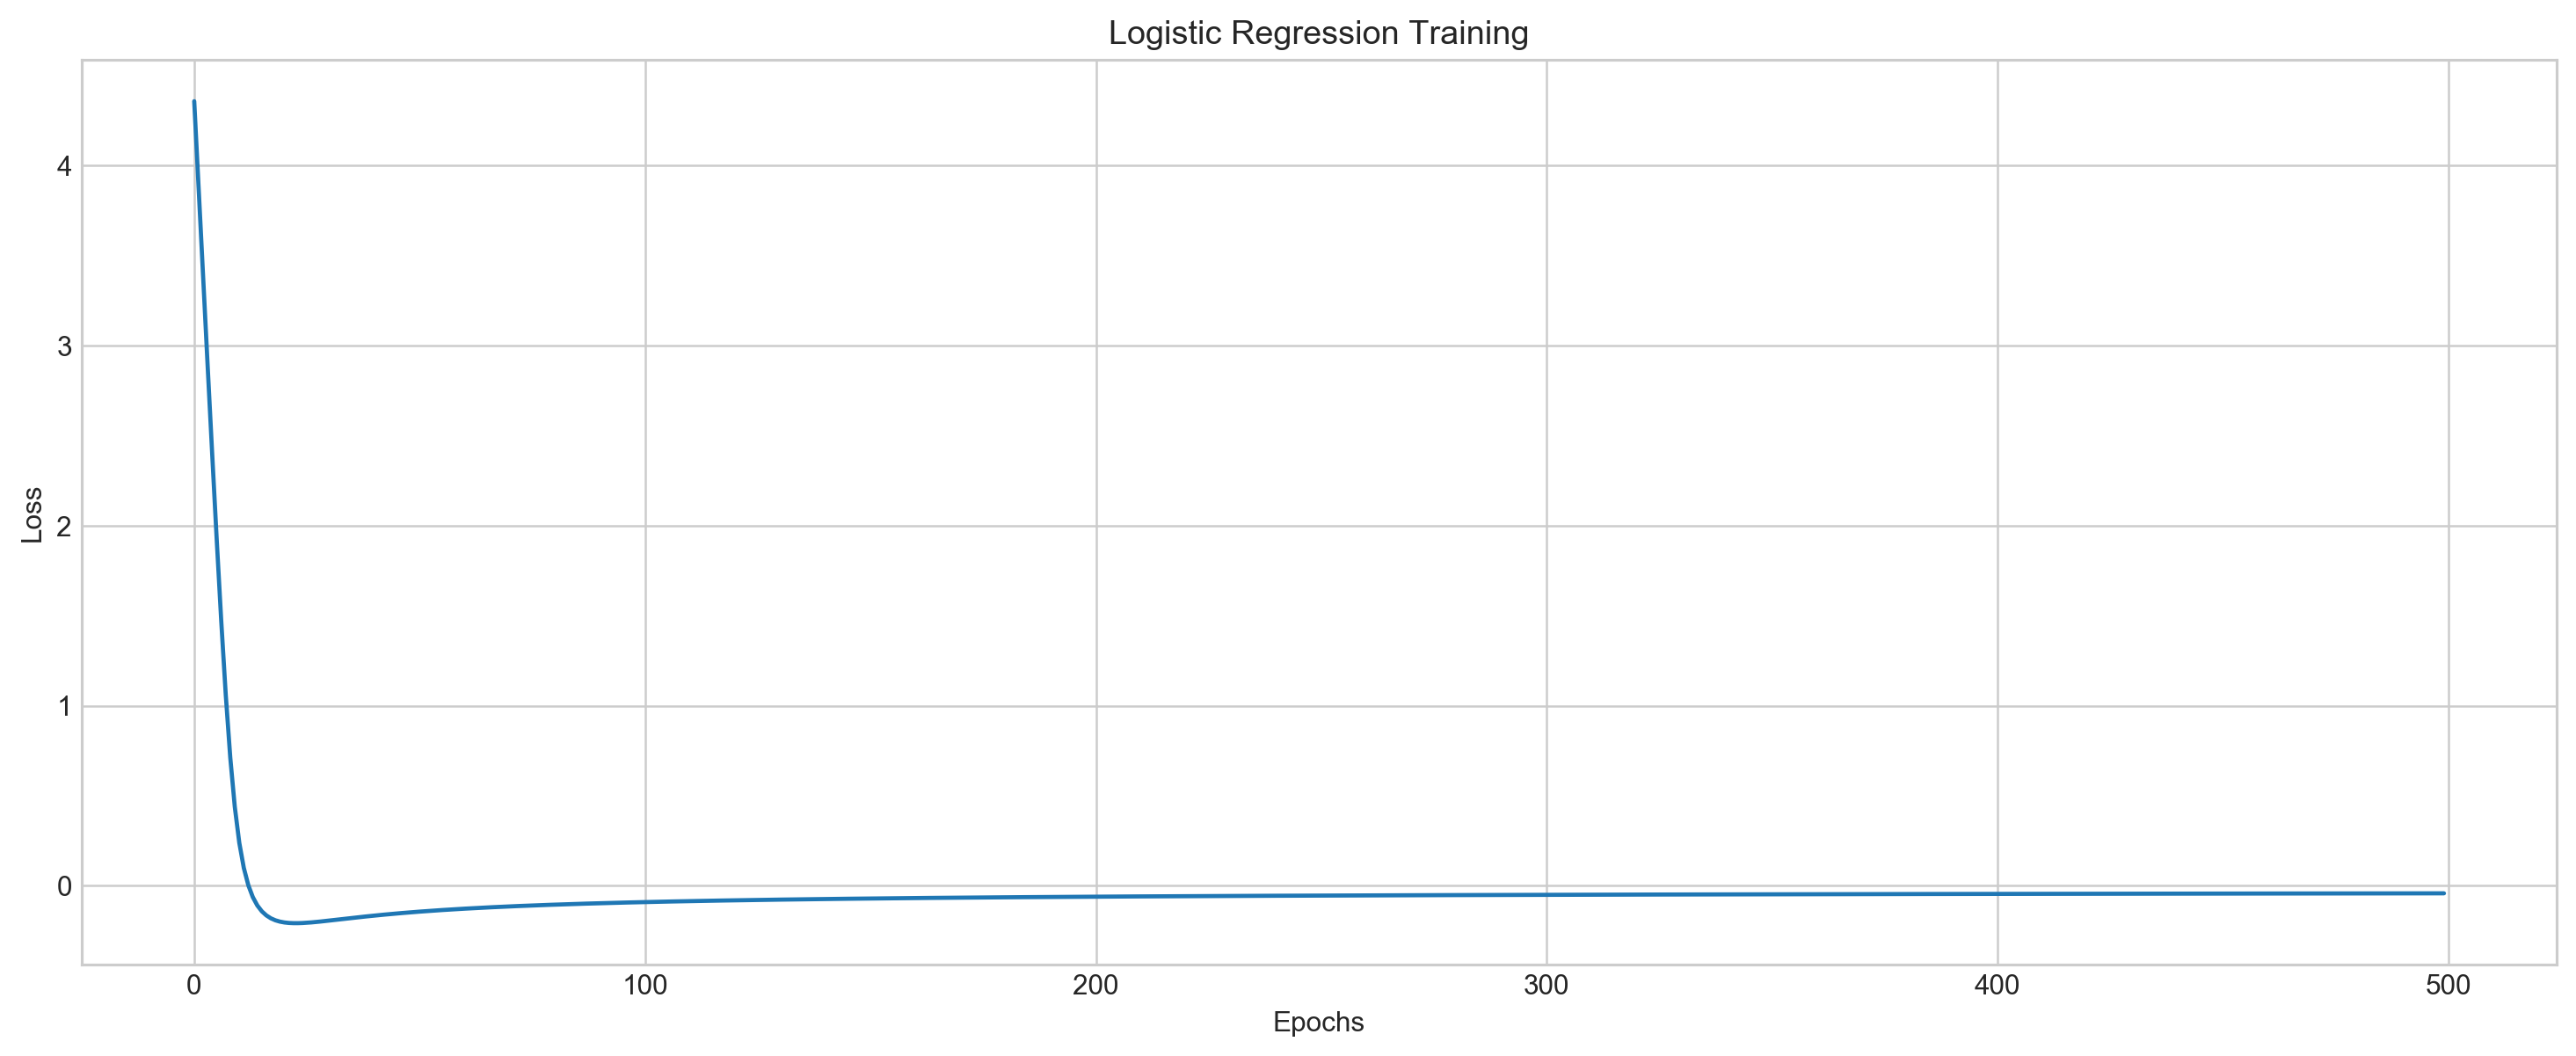

In [10]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Conclusion